In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [2]:
with open('data/day8_input.txt') as f:
    lines = f.readlines()

In [3]:
# lines = ['30373\n',
#         '25512\n',
#         '65332\n',
#         '33549\n',
#         '35390\n']

In [4]:
lines = [[*line] for line in lines]

In [5]:
def data_list_to_df(data):
    data_list = []
    x = 0
    y = 0
    while x < len(lines):
        for line in lines[x]:
            for num in line:
                if line == '\n':
                    continue
                data_list.append({'val':int(line), 'xcoord':x, 'ycoord':y})
                y += 1    
        x += 1
        y=0
    return pd.DataFrame(data_list)

In [6]:
df = data_list_to_df(lines)

In [7]:
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

<AxesSubplot:>

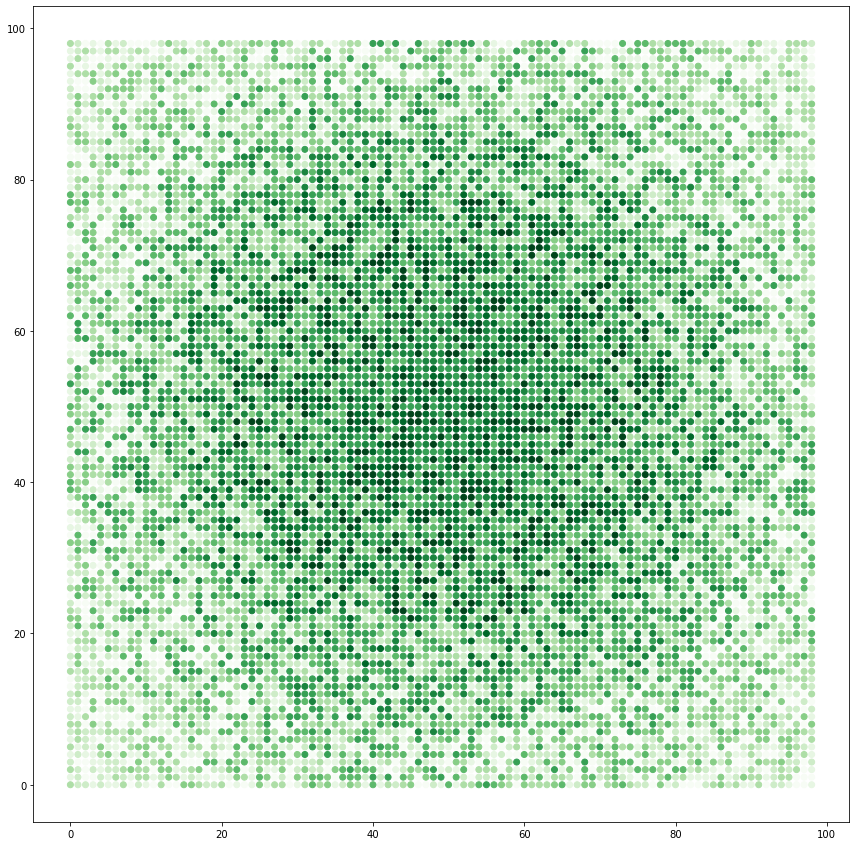

In [8]:
gdf.plot('val', cmap = 'Greens', figsize=(15,15))

In [9]:
gdf['visible'] = False

In [10]:
def calc_visible(gdf, col):
    considering_row = 0
    highest_value = -1
    for i, tree in gdf.iterrows():
        if tree[col] != considering_row:
            # We've moved to a new row - reset highest_value to -1
            considering_row = tree[col]
            highest_value = -1
    
        if tree['val'] > highest_value:
            gdf.loc[i, 'visible'] = True
            highest_value = tree['val']
    return gdf

In [11]:
gdf = calc_visible(gdf, 'xcoord')

In [12]:
gdf = gdf.sort_values(by=['xcoord',
                          'ycoord'], ascending=[False, 
                                                False]).reset_index()
gdf.drop('index', axis=1, inplace=True)
gdf = calc_visible(gdf, 'xcoord')

In [13]:
gdf = gdf.sort_values(by=['ycoord',
                          'xcoord']).reset_index()
gdf.drop('index', axis=1, inplace=True)
gdf = calc_visible(gdf, 'ycoord')

In [14]:
gdf = gdf.sort_values(by=['ycoord',
                          'xcoord'], ascending=[False, 
                                                False]).reset_index()
gdf.drop('index', axis=1, inplace=True)
gdf = calc_visible(gdf, 'ycoord')

<AxesSubplot:>

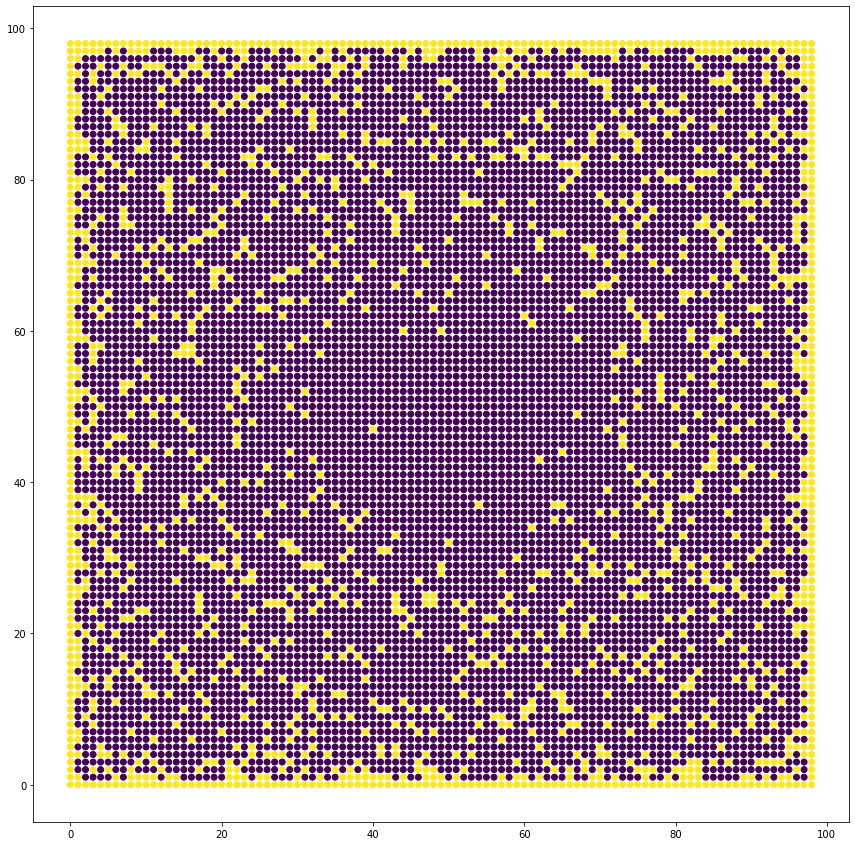

In [15]:
gdf.plot('visible', figsize=(15,15))

In [16]:
print(gdf.visible.value_counts())

False    8086
True     1715
Name: visible, dtype: int64
